# Clasificador de flores

## Objetivo

Predecir la especie de una flor (Setosa, Versicolor, Virginica) a partir de las medidas de sus pétalos y sépalos.

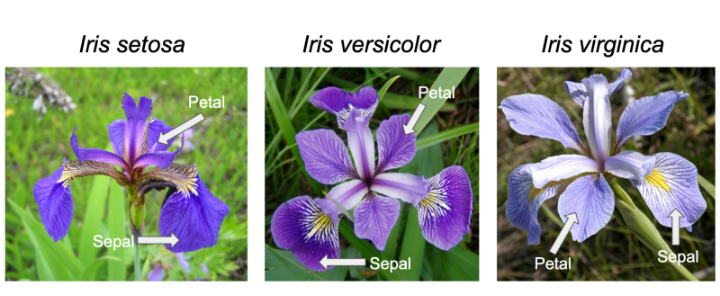

## Setup

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Machine Learning - Model
from sklearn.linear_model import LogisticRegression
# Machine Learning - Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Diccionario de variables

| Variable            | Tipo       | Descripción                                    |
| ------------------- | ---------- | ---------------------------------------------- |
| `sepal length (cm)` | Numérica   | Longitud del sépalo de la flor en centímetros. |
| `sepal width (cm)`  | Numérica   | Ancho del sépalo de la flor en centímetros.    |
| `petal length (cm)` | Numérica   | Longitud del pétalo de la flor en centímetros. |
| `petal width (cm)`  | Numérica   | Ancho del pétalo de la flor en centímetros.    |
| `species`           | Categórica | Especie de la flor. Tiene 3 categorías:        |
|                     |            | - `setosa`: especie 0                          |
|                     |            | - `versicolor`: especie 1                      |
|                     |            | - `virginica`: especie 2                       |


## Análisis exploratorio de datos (EDA)

In [ ]:
# Visualizar la dimensión del Dataset
df.shape

(150, 5)

In [ ]:
# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
# Exploración de las primeras filas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
species,object


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


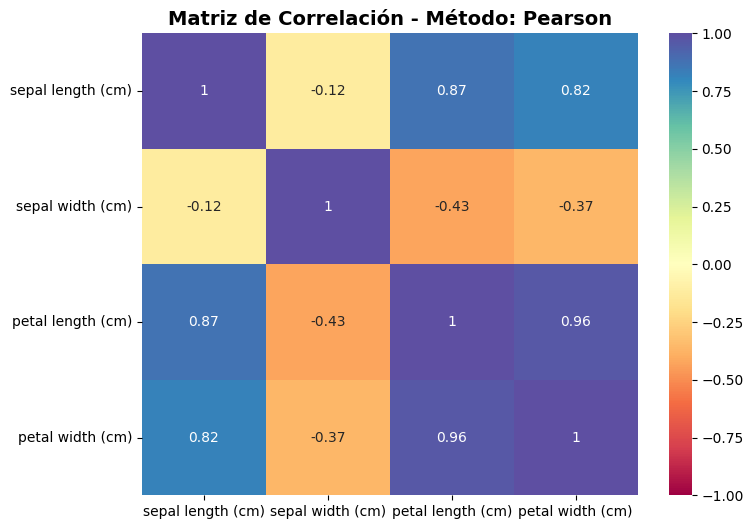

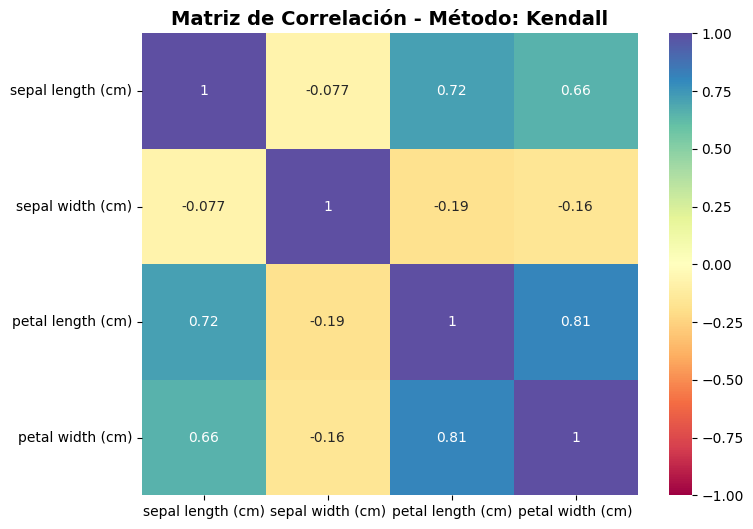

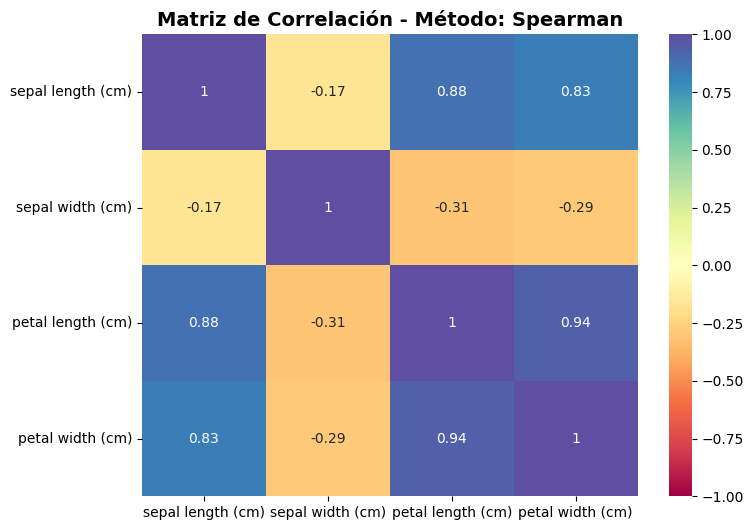

In [ ]:
# Filtrar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular matrices de correlación
corr_methods = ['pearson', 'kendall', 'spearman']

for method in corr_methods:
    corr_matrix = numeric_df.corr(method=method)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlación - Método: {method.capitalize()}', fontsize=14, fontweight='bold')
    plt.show()

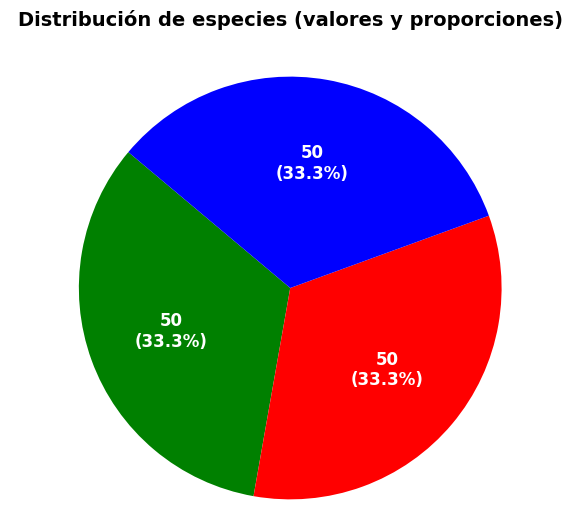

In [ ]:
# Recuento de especies
species_counts = df['species'].value_counts()
species_labels = species_counts.index
colors = ['green', 'red', 'blue']

# Gráfico de torta con autopct para mostrar valores y %
plt.figure(figsize=(6,6))
plt.pie(
    species_counts,
    labels=species_labels,
    colors=colors,
    startangle=140,
    autopct=lambda p: f"{int(p * sum(species_counts) / 100)}\n({p:.1f}%)",
    textprops={'fontsize': 12, 'color': 'white', 'fontweight': 'bold'}
)

plt.title("Distribución de especies (valores y proporciones)", fontsize=14, fontweight='bold', y=1.05)
plt.axis('equal')
plt.show()

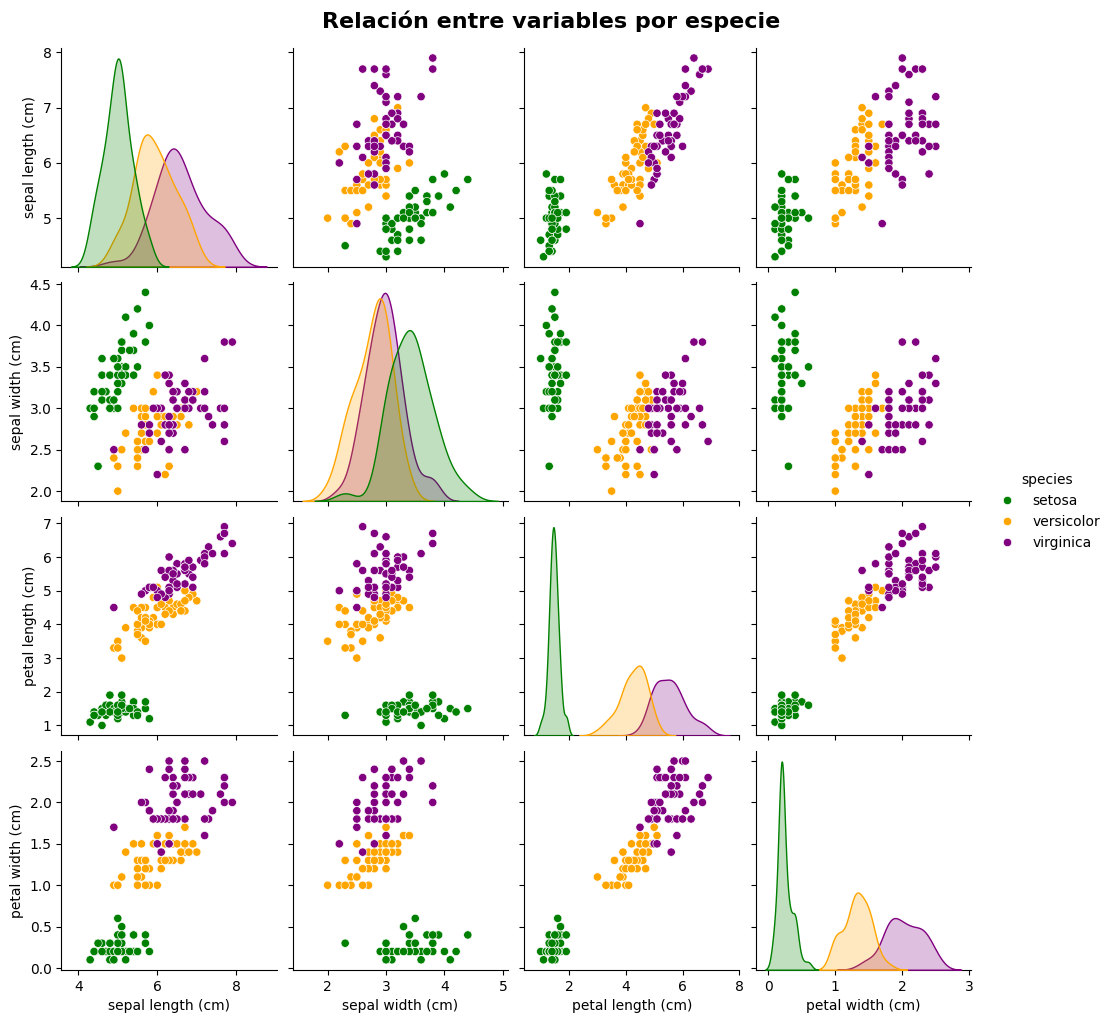

In [ ]:
# Graficar
custom_palette = {
    'setosa': 'green',
    'versicolor': 'orange',
    'virginica': 'purple'
}

sns.pairplot(df, hue='species', palette=custom_palette)
plt.suptitle("Relación entre variables por especie", y=1.02, fontsize=16, fontweight='bold')
plt.show()

## Modelo de Machine Learning - Logistic Regression

In [ ]:
# Separar variables y target
X = df.drop('species', axis=1)
y = df['species']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

### Evaluación del modelo

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



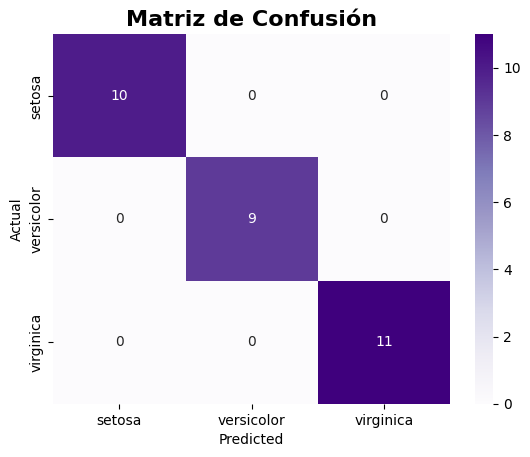

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión', fontsize=16, fontweight='bold')
plt.show()